# Project: Loan Eligibility Prediction

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Data loading

In [178]:
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [179]:
train_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [180]:
test_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [233]:
train = train_data.copy()
test = test_data.copy()

# Data cleaning & EDA

In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [236]:
del train['Loan_ID']
del train['Loan_Status']
del test['Loan_ID']

In [237]:
# deal w/ missing value
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [238]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object'])

In [239]:
#fill missing categorical variables with the mode
for i in cat_cols:
    i_most = train[i].value_counts().index[0]
    train[i] = train[i].fillna(i_most)
    test[i] = test[i].fillna(i_most)
    

In [221]:
# train['Loan_Status'] = train_data['Loan_Status']
# cat_cols = train.select_dtypes(include=['object'])

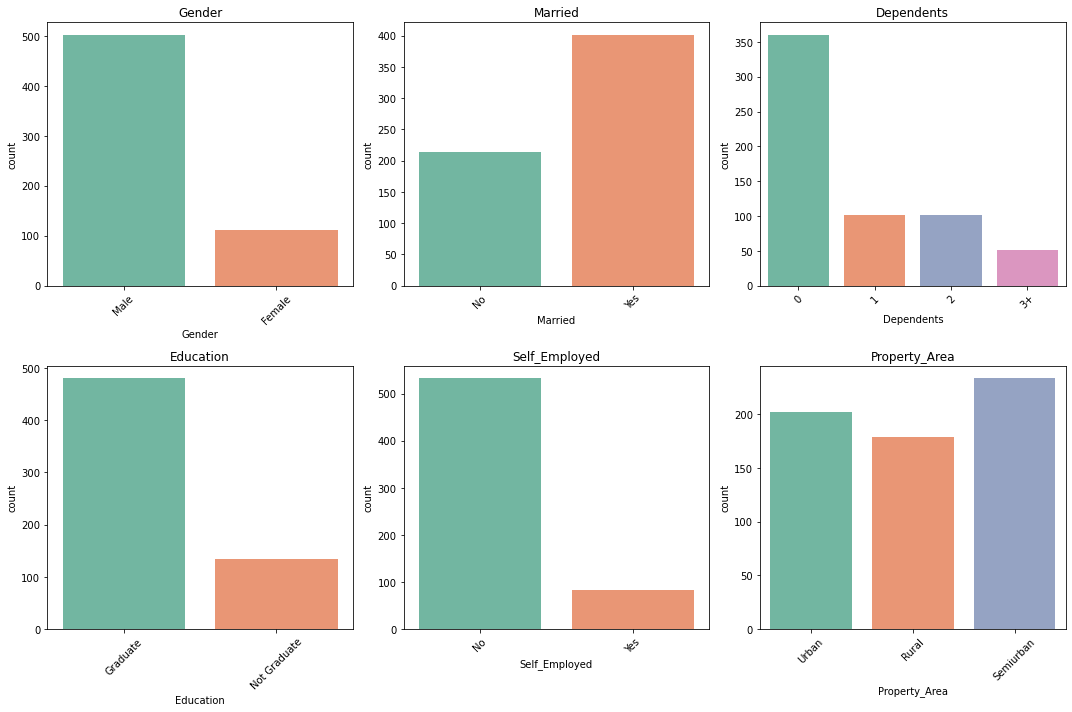

In [246]:
#hist for cat_cols
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)  
    sns.countplot(x=col, data=train, palette='Set2')
    plt.title(f'{col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the chart, we can observe that:

- Out of approximately 600 applicants, around 500 are male (83.33%) and about 100 are female (16.67%).

- Around 400 applicants are married (66.67%).

- The majority have no dependents.

- Nearly 500 applicants are graduates.

- Most applicants are not self-employed, with fewer than 100 being self-employed (16.67%).

- In terms of property area, Semiurban has the highest number of applicants, followed by Urban, with Rural having the fewest.


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

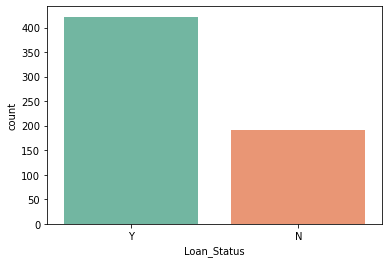

In [247]:
sns.countplot(x='Loan_Status', data=train_data, palette='Set2')

- Regarding loan status, more than 400 applicants (~66.67%) were approved

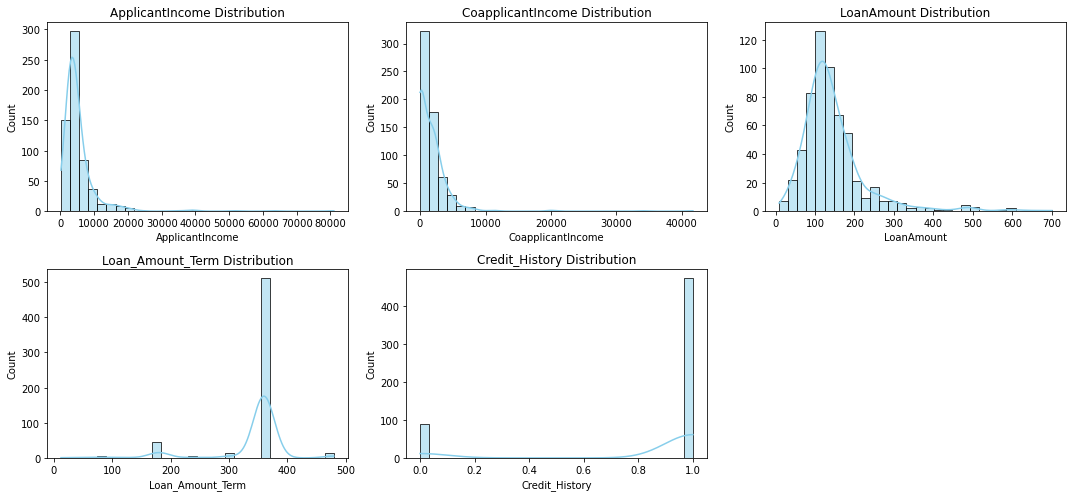

In [223]:
#hist for num_cols
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

From the chart, we can observe that:

- ApplicantIncome is mostly concentrated in the range of 0–10,000.

- CoapplicantIncome is primarily in the range of 0–5,000.

- LoanAmount is largely centered around 100.

- Loan_Amount_Term values are mainly around 360.

- Fewer than 100 applicants lack a credit history, with the majority having one.

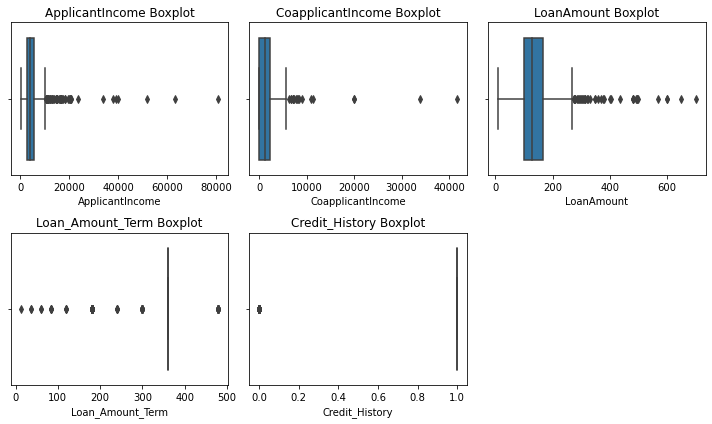

In [224]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

<AxesSubplot:>

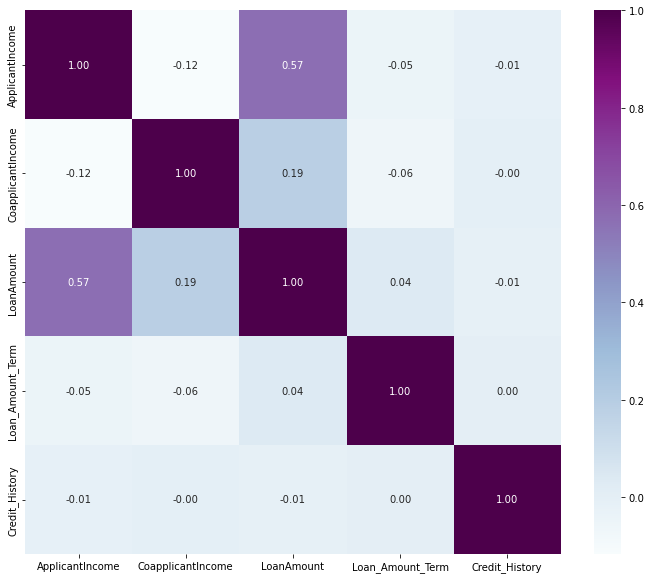

In [249]:
#corr among numerical features
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True, cmap='BuPu', fmt=".2f")

After performing one-hot encoding and generating the correlation heatmap, I found that LoanAmount is positively correlated with ApplicantIncome, and Credit_History is strongly correlated with Loan_Status. 
- Therefore, missing values in ApplicantIncome and Credit_History can be imputed using predictive modeling. 

In [251]:
# fill na in Loan_Amount_Term & Credit_History
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

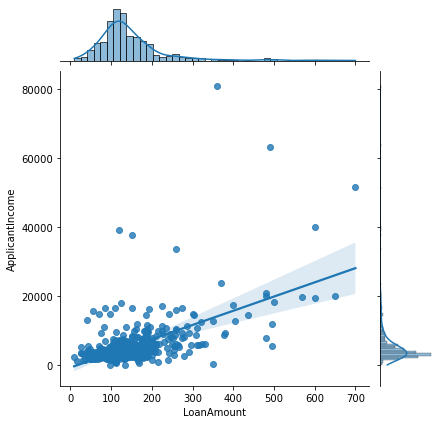

In [252]:
sns.jointplot(x='LoanAmount', y='ApplicantIncome',
                      data=train,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)

In [253]:
# predict na in LoanAmount by using linear regression
#X,y train dataset
train_non_na = train.dropna(subset=['LoanAmount'])
X_train = train_non_na[['ApplicantIncome']].values
y_train = train_non_na['LoanAmount'].values

# predict dataset
predict_train = train['LoanAmount'].isna()
X_predict_train = train.loc[predict_train, ['ApplicantIncome']].values

predict_test = test['LoanAmount'].isna()
X_predict_test = test.loc[predict_test, ['ApplicantIncome']].values


#model
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict
train.loc[predict_train, 'LoanAmount'] = lr.predict(X_predict_train)
test.loc[predict_test, 'LoanAmount'] = lr.predict(X_predict_test)


In [255]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [256]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# More EDA